# Exercise 3

Work on this before the next lecture on 19 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/7). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

The overall idea of this exercise is to get started and the nto freely experiment with the building blocks fo keras.

# The Dataset

To get going we will use a dataset which contains images of fashion items. It was created by [Zalanod research](https://github.com/zalandoresearch/fashion-mnist) to provide an alternative to the old MNIST digits dataset. Fashion MNIST is small like MNIST (28x28 pixel images), good size (60000 examples), and significantly harder than MNIST.

There are ten classes (or types) of items:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [26]:
# plotting imports and setup
%matplotlib inline

import matplotlib.pyplot as plt

## Keras

We will use the Keras library through out this course. It is a high-level interface to tensorflow. Quoting [the keras website](https://keras.io/):

> It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
>
> Use Keras if you need a deep learning library that:
>
>   * Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
>   * Supports both convolutional networks and recurrent networks, as well as combinations of the two.
>   * Runs seamlessly on CPU and GPU.

### Note
To use keras you will have to first install it with `pip install tensorflow keras`.

In [27]:
# Fashion MNIST is built into keras
from keras.datasets import fashion_mnist

In [28]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [29]:
# How is the data stored?
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


There are 60000 examples, each of shape `28x28`. This makes sense as we are dealing with images that are 28x28 pixels big. Let's look at a few.

In [30]:
# classes are already shuffled
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

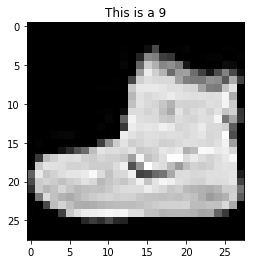

In [32]:
plt.imshow(X_train[0], cmap='gray')
plt.title("This is a %i" % y_train[0]);

> ### Challenge
>
> Make a function that plots a single example and uses a human readable label instead of an integer (replace the 9 in the previous example with "ankleboot"). You can find the human labels [here](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles).

In [33]:
# your code here

# A first neural network

Let's build a first neural network. Fit it to some toy data. In its simple form this is equivalent to performing logistic regression. Experiment with different toy datasets and adding more layers of different widths to the network. Try out different activation functions (nonlinearities).

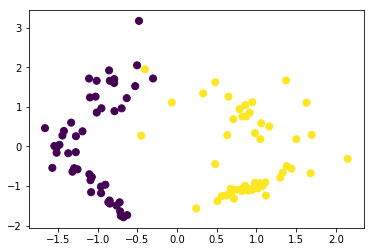

In [185]:
from sklearn.datasets import make_classification


X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=50)

In [186]:
import numpy as np


def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

Y_ = one_hot(2, y)

In [190]:
from keras.layers import Input, Dense, Activation
from keras.models import Model

np.random.seed(123+3)

# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(10)(inputs)
x = Activation('relu')(x)
x = Dense(2)(inputs)
# to find out more about activations check the keras documentation
predictions = Activation('relu')(x)
predictions1 = Activation('sigmoid')(x)
predictions2 = Activation('tanh')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model1 = Model(inputs=inputs, outputs=predictions1)
model2 = Model(inputs=inputs, outputs=predictions2)
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'],
              )
model1.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'],
              )
model2.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'],
              )
# to fit the model uncomment this line, experiment with the various settings
model.fit(X, Y_, epochs=100, verbose=False)
model1.fit(X, Y_, epochs=100, verbose=False)
model2.fit(X, Y_, epochs=100, verbose=False)

In [191]:
print(model.predict(np.array([[1,.9], [1,-.9]])))
print(model1.predict(np.array([[1,.9], [1,-.9]])))
print(model2.predict(np.array([[1,.9], [1,-.9]])))

#big change here in the prediction, why ??? 

[[1.8060207e-04 1.3009870e+00]
 [0.0000000e+00 1.3355684e+00]]


[[0.5000452  0.786001  ]
 [0.49652928 0.79176027]]


[[ 1.80602059e-04  8.61976981e-01]
 [-1.38821015e-02  8.70603681e-01]]


## Questions

* plot the decision surface of the network
* create a circle-in-circle dataset and try to classify it
  * basically try to repliacte [this tensorflow playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.88320&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) setup or something similar to it.
  
  
---

(100, 100)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


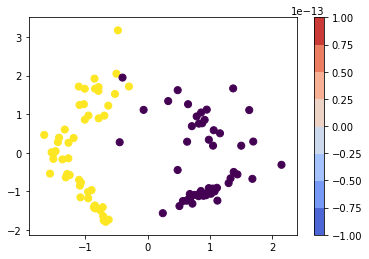

(100, 100)


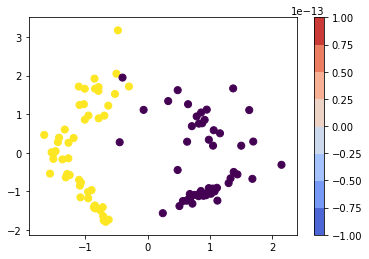

(100, 100)


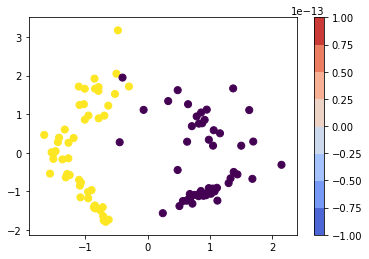

In [189]:
def decision_surface(model, X, y):
    x_vec= np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    y_vec =np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
    x_grid, y_grid = np.meshgrid(x_vec, y_vec)

    x_grid = x_grid.flatten()
    y_grid = y_grid.flatten()

    grid = np.array([x_grid, y_grid]).transpose()

    out = model.predict(grid)
    out = out.reshape(100,100,2)
    print(np.shape(out[:,:,0]))

    plt.figure()
    plt.contourf(x_vec, y_vec, out[:,:,0],  cmap="coolwarm")
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=(1.-y),
                s=50)
    plt.show()

decision_surface(model,X,y)
decision_surface(model1,X,y)
decision_surface(model2,X,y)

    

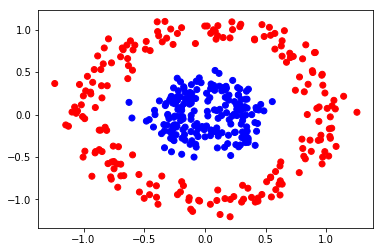

In [174]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y_lab = np.take(labels, (y < 0.5))
Y_ = one_hot(2, y)
plt.scatter(X[:,0], X[:,1], c=y_lab)

(100, 100)


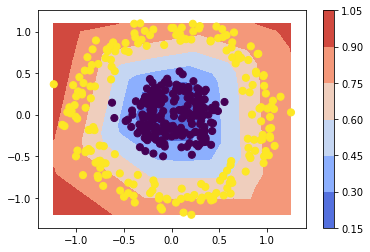

In [180]:
np.random.seed(123+3)

# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(10)(inputs)
x = Activation("relu")(x)
# x = Dense(10)(x)
# x = Activation("softmax")(x)
# x = Dense(10)(x)
# x = Activation("softmax")(x)
# x = Dense(10)(x)
# x = Activation("softmax")(x)
x = Dense(2)(x)
# to find out more about activations check the keras documentation
predictions = Activation('softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'],
              )
model.fit(X, Y_, epochs=300, verbose=False)
decision_surface(model,X,y)


# Fashion neural network

Now let's graduate to classifying fashion items. The structure should be very similar to the simple neural network but you might need more layers of different widths.

* what network structures work?
  * more layers or wider layers or both?
* how good can you make your network?
  * what did you use as baseline to compare your performance to?
* experiment!
* (bonus) how does your NN compare to a random forest with about 200 trees (or some other decision tree based classifier)?

In [156]:
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Split off some validation data

To measure our Neural Networks performance we will need some validation data. The `train_test_split` helper from scikit-learn does this for us.

In [157]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=10000,
                                                  random_state=42)

### One more thing

We need to convert the labels from integers (0, 1, 2, 3, ...) to  a one-hot encoding. The one-hot encoding for a problem with ten classes is a ten dimensional vector for each sample. For a sample in class 4 every entry is zero except for the fourth one. Let's check it out:

In [158]:
from keras import utils


num_classes = 10
y_train_ = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [159]:
y_train[:5]

array([5, 0, 0, 1, 4], dtype=uint8)

In [160]:
# modified y
y_train_[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [161]:
# let's make y_train the same as the others
y_train = utils.to_categorical(y_train, num_classes)

# Model building

We now define the model architecture and train the model. To learn more about the building blocks that are available check out the [keras documentation](https://keras.io/layers/about-keras-layers/).

In [162]:
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten

In [163]:
# we define the input shape (i.e., how many input features) **without** the batch size
x = Input(shape=(28, 28, ))

# turn a 28x28 matrix into a 784-d vector, this removes all information
# about the spatial relation between pixels. Using convolutions will
# allow us to take advantage of that information (see later)
h = Flatten()(x)

h = Dense(50)(h)
h = Activation('tanh')(h)
h = Dense(50)(h)
h = Activation('tanh')(h)
h = Dense(50)(h)
h = Activation('tanh')(h)
h = Dense(50)(h)
h = Activation('tanh')(h)
h = Dense(50)(h)
h = Activation('tanh')(h)

h = Dense(2)(h)

# we want to predict one of ten classes
h = Dense(10)(h)
y = Activation('softmax')(h)


# Package it all up in a Model
net = Model(x, y)

## Model structure

You can print out the structure of your network and check how many parameters it has, etc

In [164]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        (None, 28, 28)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 50)                39250     
_________________________________________________________________
activation_123 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 50)                2550      
_________________________________________________________________
activation_124 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 50)                2550      
__________

## Training the model

In [165]:
net.compile(loss='categorical_crossentropy',
            optimizer='sgd',
            metrics=['accuracy'])

In [166]:
batch_size = 128
history = net.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20


  128/50000 [..............................] - ETA: 6:42 - loss: 2.3053 - acc: 0.0859

 2176/50000 [>.............................] - ETA: 23s - loss: 2.2861 - acc: 0.1213 

 4224/50000 [=>............................] - ETA: 12s - loss: 2.2729 - acc: 0.1404

 6272/50000 [==>...........................] - ETA: 8s - loss: 2.2608 - acc: 0.1496 

 8192/50000 [===>..........................] - ETA: 6s - loss: 2.2481 - acc: 0.1553

 9984/50000 [====>.........................] - ETA: 5s - loss: 2.2373 - acc: 0.1558

11904/50000 [======>.......................] - ETA: 4s - loss: 2.2241 - acc: 0.1585

13952/50000 [=======>......................] - ETA: 3s - loss: 2.2118 - acc: 0.1598

16000/50000 [========>.....................] - ETA: 3s - loss: 2.1991 - acc: 0.1606

18176/50000 [=========>....................] - ETA: 2s - loss: 2.1854 - acc: 0.1621

20224/50000 [===========>..................] - ETA: 2s - loss: 2.1707 - acc: 0.1656

22272/50000 [============>.................] - ETA: 1s - loss: 2.1585 - acc: 0.1696

24320/50000 [=============>................] - ETA: 1s - loss: 2.1452 - acc: 0.1741

26496/50000 [==============>...............] - ETA: 1s - loss: 2.1320 - acc: 0.1789

28672/50000 [================>.............] - ETA: 1s - loss: 2.1193 - acc: 0.1846

30848/50000 [=================>............] - ETA: 1s - loss: 2.1048 - acc: 0.1891

33024/50000 [==================>...........] - ETA: 0s - loss: 2.0919 - acc: 0.1946

35072/50000 [====================>.........] - ETA: 0s - loss: 2.0785 - acc: 0.2009

37248/50000 [=====================>........] - ETA: 0s - loss: 2.0656 - acc: 0.2063

39296/50000 [======================>.......] - ETA: 0s - loss: 2.0531 - acc: 0.2121

41344/50000 [=======================>......] - ETA: 0s - loss: 2.0400 - acc: 0.2188

43520/50000 [=========================>....] - ETA: 0s - loss: 2.0257 - acc: 0.2245

45696/50000 [==========================>...] - ETA: 0s - loss: 2.0116 - acc: 0.2307

47872/50000 [===========================>..] - ETA: 0s - loss: 1.9964 - acc: 0.2368

50000/50000 [==============================] - 3s 50us/step - loss: 1.9829 - acc: 0.2437 - val_loss: 1.6638 - val_acc: 0.3943


Epoch 2/20
  128/50000 [..............................] - ETA: 2s - loss: 1.5671 - acc: 0.3828

 2048/50000 [>.............................] - ETA: 1s - loss: 1.6286 - acc: 0.3945

 4224/50000 [=>............................] - ETA: 1s - loss: 1.6359 - acc: 0.4020

 6400/50000 [==>...........................] - ETA: 1s - loss: 1.6203 - acc: 0.4031

 8576/50000 [====>.........................] - ETA: 1s - loss: 1.6046 - acc: 0.4067

10752/50000 [=====>........................] - ETA: 0s - loss: 1.5898 - acc: 0.4116

12928/50000 [======>.......................] - ETA: 0s - loss: 1.5785 - acc: 0.4174

14976/50000 [=======>......................] - ETA: 0s - loss: 1.5658 - acc: 0.4207

17024/50000 [=========>....................] - ETA: 0s - loss: 1.5514 - acc: 0.4256

19072/50000 [==========>...................] - ETA: 0s - loss: 1.5393 - acc: 0.4277

21120/50000 [===========>..................] - ETA: 0s - loss: 1.5272 - acc: 0.4328

23296/50000 [============>.................] - ETA: 0s - loss: 1.5152 - acc: 0.4367

25472/50000 [==============>...............] - ETA: 0s - loss: 1.5015 - acc: 0.4413

27520/50000 [===============>..............] - ETA: 0s - loss: 1.4902 - acc: 0.4429

29568/50000 [================>.............] - ETA: 0s - loss: 1.4780 - acc: 0.4450

31616/50000 [=================>............] - ETA: 0s - loss: 1.4655 - acc: 0.4487

33792/50000 [===================>..........] - ETA: 0s - loss: 1.4548 - acc: 0.4518

36096/50000 [====================>.........] - ETA: 0s - loss: 1.4421 - acc: 0.4557

38272/50000 [=====================>........] - ETA: 0s - loss: 1.4297 - acc: 0.4595

40448/50000 [=======================>......] - ETA: 0s - loss: 1.4176 - acc: 0.4628

42496/50000 [========================>.....] - ETA: 0s - loss: 1.4074 - acc: 0.4662

44544/50000 [=========================>....] - ETA: 0s - loss: 1.3966 - acc: 0.4693

46592/50000 [==========================>...] - ETA: 0s - loss: 1.3872 - acc: 0.4722

48768/50000 [============================>.] - ETA: 0s - loss: 1.3758 - acc: 0.4759

50000/50000 [==============================] - 1s 27us/step - loss: 1.3702 - acc: 0.4770 - val_loss: 1.1568 - val_acc: 0.5402


Epoch 3/20
  128/50000 [..............................] - ETA: 1s - loss: 1.1578 - acc: 0.5625

 2176/50000 [>.............................] - ETA: 1s - loss: 1.1268 - acc: 0.5680

 4224/50000 [=>............................] - ETA: 1s - loss: 1.1312 - acc: 0.5620

 6400/50000 [==>...........................] - ETA: 1s - loss: 1.1288 - acc: 0.5636

 8576/50000 [====>.........................] - ETA: 1s - loss: 1.1250 - acc: 0.5654

10624/50000 [=====>........................] - ETA: 0s - loss: 1.1158 - acc: 0.5730

12800/50000 [======>.......................] - ETA: 0s - loss: 1.1086 - acc: 0.5782

14976/50000 [=======>......................] - ETA: 0s - loss: 1.1026 - acc: 0.5768

17152/50000 [=========>....................] - ETA: 0s - loss: 1.0968 - acc: 0.5803

19456/50000 [==========>...................] - ETA: 0s - loss: 1.0905 - acc: 0.5833

21760/50000 [============>.................] - ETA: 0s - loss: 1.0854 - acc: 0.5890

23936/50000 [=============>................] - ETA: 0s - loss: 1.0835 - acc: 0.5934

26112/50000 [==============>...............] - ETA: 0s - loss: 1.0761 - acc: 0.5980

28160/50000 [===============>..............] - ETA: 0s - loss: 1.0715 - acc: 0.6012

30208/50000 [=================>............] - ETA: 0s - loss: 1.0687 - acc: 0.6035

32384/50000 [==================>...........] - ETA: 0s - loss: 1.0648 - acc: 0.6059

34560/50000 [===================>..........] - ETA: 0s - loss: 1.0618 - acc: 0.6080

36608/50000 [====================>.........] - ETA: 0s - loss: 1.0608 - acc: 0.6099

38912/50000 [======================>.......] - ETA: 0s - loss: 1.0561 - acc: 0.6126

41088/50000 [=======================>......] - ETA: 0s - loss: 1.0533 - acc: 0.6141

43264/50000 [========================>.....] - ETA: 0s - loss: 1.0518 - acc: 0.6160

45568/50000 [==========================>...] - ETA: 0s - loss: 1.0488 - acc: 0.6177

47872/50000 [===========================>..] - ETA: 0s - loss: 1.0451 - acc: 0.6202

49920/50000 [============================>.] - ETA: 0s - loss: 1.0419 - acc: 0.6217

50000/50000 [==============================] - 1s 26us/step - loss: 1.0420 - acc: 0.6217 - val_loss: 0.9767 - val_acc: 0.6518


Epoch 4/20
  128/50000 [..............................] - ETA: 1s - loss: 0.9202 - acc: 0.6406

 2048/50000 [>.............................] - ETA: 1s - loss: 0.9451 - acc: 0.6626

 4096/50000 [=>............................] - ETA: 1s - loss: 0.9592 - acc: 0.6636

 6144/50000 [==>...........................] - ETA: 1s - loss: 0.9528 - acc: 0.6709

 8192/50000 [===>..........................] - ETA: 1s - loss: 0.9527 - acc: 0.6652

10240/50000 [=====>........................] - ETA: 1s - loss: 0.9606 - acc: 0.6654

12288/50000 [======>.......................] - ETA: 0s - loss: 0.9618 - acc: 0.6654

14464/50000 [=======>......................] - ETA: 0s - loss: 0.9635 - acc: 0.6643

16640/50000 [========>.....................] - ETA: 0s - loss: 0.9598 - acc: 0.6643

18688/50000 [==========>...................] - ETA: 0s - loss: 0.9571 - acc: 0.6654

20864/50000 [===========>..................] - ETA: 0s - loss: 0.9516 - acc: 0.6665

23040/50000 [============>.................] - ETA: 0s - loss: 0.9480 - acc: 0.6672

25216/50000 [==============>...............] - ETA: 0s - loss: 0.9473 - acc: 0.6689

27264/50000 [===============>..............] - ETA: 0s - loss: 0.9441 - acc: 0.6692

29440/50000 [================>.............] - ETA: 0s - loss: 0.9425 - acc: 0.6687

31616/50000 [=================>............] - ETA: 0s - loss: 0.9393 - acc: 0.6685

33792/50000 [===================>..........] - ETA: 0s - loss: 0.9376 - acc: 0.6686

35968/50000 [====================>.........] - ETA: 0s - loss: 0.9351 - acc: 0.6695

38016/50000 [=====================>........] - ETA: 0s - loss: 0.9343 - acc: 0.6698

40192/50000 [=======================>......] - ETA: 0s - loss: 0.9323 - acc: 0.6707

42368/50000 [========================>.....] - ETA: 0s - loss: 0.9302 - acc: 0.6712

44544/50000 [=========================>....] - ETA: 0s - loss: 0.9292 - acc: 0.6720

46720/50000 [===========================>..] - ETA: 0s - loss: 0.9284 - acc: 0.6718

48768/50000 [============================>.] - ETA: 0s - loss: 0.9256 - acc: 0.6730

50000/50000 [==============================] - 1s 27us/step - loss: 0.9246 - acc: 0.6732 - val_loss: 0.8999 - val_acc: 0.6818


Epoch 5/20
  128/50000 [..............................] - ETA: 2s - loss: 0.8904 - acc: 0.7109

 2048/50000 [>.............................] - ETA: 1s - loss: 0.9006 - acc: 0.6865

 4096/50000 [=>............................] - ETA: 1s - loss: 0.8972 - acc: 0.6807

 6272/50000 [==>...........................] - ETA: 1s - loss: 0.8822 - acc: 0.6842

 8448/50000 [====>.........................] - ETA: 1s - loss: 0.8749 - acc: 0.6857

10624/50000 [=====>........................] - ETA: 0s - loss: 0.8713 - acc: 0.6890

12800/50000 [======>.......................] - ETA: 0s - loss: 0.8777 - acc: 0.6863

14848/50000 [=======>......................] - ETA: 0s - loss: 0.8783 - acc: 0.6868

17024/50000 [=========>....................] - ETA: 0s - loss: 0.8782 - acc: 0.6874

19200/50000 [==========>...................] - ETA: 0s - loss: 0.8808 - acc: 0.6878

21376/50000 [===========>..................] - ETA: 0s - loss: 0.8808 - acc: 0.6861

23424/50000 [=============>................] - ETA: 0s - loss: 0.8778 - acc: 0.6866

25472/50000 [==============>...............] - ETA: 0s - loss: 0.8777 - acc: 0.6869

27520/50000 [===============>..............] - ETA: 0s - loss: 0.8749 - acc: 0.6886

29696/50000 [================>.............] - ETA: 0s - loss: 0.8750 - acc: 0.6884

31872/50000 [==================>...........] - ETA: 0s - loss: 0.8749 - acc: 0.6884

34048/50000 [===================>..........] - ETA: 0s - loss: 0.8733 - acc: 0.6902

36224/50000 [====================>.........] - ETA: 0s - loss: 0.8711 - acc: 0.6912

38272/50000 [=====================>........] - ETA: 0s - loss: 0.8700 - acc: 0.6914

40448/50000 [=======================>......] - ETA: 0s - loss: 0.8696 - acc: 0.6923

42752/50000 [========================>.....] - ETA: 0s - loss: 0.8672 - acc: 0.6935

44928/50000 [=========================>....] - ETA: 0s - loss: 0.8647 - acc: 0.6944

47104/50000 [===========================>..] - ETA: 0s - loss: 0.8651 - acc: 0.6940

49280/50000 [============================>.] - ETA: 0s - loss: 0.8644 - acc: 0.6943

50000/50000 [==============================] - 1s 27us/step - loss: 0.8635 - acc: 0.6947 - val_loss: 0.8533 - val_acc: 0.7000


Epoch 6/20
  128/50000 [..............................] - ETA: 2s - loss: 0.9415 - acc: 0.7109

 2048/50000 [>.............................] - ETA: 1s - loss: 0.8501 - acc: 0.7070

 4224/50000 [=>............................] - ETA: 1s - loss: 0.8532 - acc: 0.7086

 6400/50000 [==>...........................] - ETA: 1s - loss: 0.8303 - acc: 0.7066

 8576/50000 [====>.........................] - ETA: 1s - loss: 0.8375 - acc: 0.7037

10624/50000 [=====>........................] - ETA: 0s - loss: 0.8319 - acc: 0.7043

12800/50000 [======>.......................] - ETA: 0s - loss: 0.8253 - acc: 0.7080

14848/50000 [=======>......................] - ETA: 0s - loss: 0.8285 - acc: 0.7068

17024/50000 [=========>....................] - ETA: 0s - loss: 0.8304 - acc: 0.7070

19200/50000 [==========>...................] - ETA: 0s - loss: 0.8295 - acc: 0.7081

21376/50000 [===========>..................] - ETA: 0s - loss: 0.8290 - acc: 0.7091

23552/50000 [=============>................] - ETA: 0s - loss: 0.8311 - acc: 0.7084

25600/50000 [==============>...............] - ETA: 0s - loss: 0.8301 - acc: 0.7101

27648/50000 [===============>..............] - ETA: 0s - loss: 0.8283 - acc: 0.7104

29824/50000 [================>.............] - ETA: 0s - loss: 0.8268 - acc: 0.7101

32000/50000 [==================>...........] - ETA: 0s - loss: 0.8258 - acc: 0.7108

34176/50000 [===================>..........] - ETA: 0s - loss: 0.8240 - acc: 0.7120

36352/50000 [====================>.........] - ETA: 0s - loss: 0.8234 - acc: 0.7123

38400/50000 [======================>.......] - ETA: 0s - loss: 0.8230 - acc: 0.7123

40576/50000 [=======================>......] - ETA: 0s - loss: 0.8214 - acc: 0.7136

42752/50000 [========================>.....] - ETA: 0s - loss: 0.8203 - acc: 0.7139

44928/50000 [=========================>....] - ETA: 0s - loss: 0.8220 - acc: 0.7138

46976/50000 [===========================>..] - ETA: 0s - loss: 0.8233 - acc: 0.7135

49152/50000 [============================>.] - ETA: 0s - loss: 0.8220 - acc: 0.7137

50000/50000 [==============================] - 1s 27us/step - loss: 0.8215 - acc: 0.7139 - val_loss: 0.8207 - val_acc: 0.7170


Epoch 7/20
  128/50000 [..............................] - ETA: 1s - loss: 0.7900 - acc: 0.7109

 2176/50000 [>.............................] - ETA: 1s - loss: 0.8445 - acc: 0.7050

 4224/50000 [=>............................] - ETA: 1s - loss: 0.8249 - acc: 0.7131

 6272/50000 [==>...........................] - ETA: 1s - loss: 0.8156 - acc: 0.7176

 8320/50000 [===>..........................] - ETA: 1s - loss: 0.8144 - acc: 0.7215

10368/50000 [=====>........................] - ETA: 0s - loss: 0.8082 - acc: 0.7220

12544/50000 [======>.......................] - ETA: 0s - loss: 0.8095 - acc: 0.7230

14592/50000 [=======>......................] - ETA: 0s - loss: 0.8142 - acc: 0.7223

16512/50000 [========>.....................] - ETA: 0s - loss: 0.8102 - acc: 0.7220

18432/50000 [==========>...................] - ETA: 0s - loss: 0.8038 - acc: 0.7230

20480/50000 [===========>..................] - ETA: 0s - loss: 0.8033 - acc: 0.7236

22656/50000 [============>.................] - ETA: 0s - loss: 0.8021 - acc: 0.7230

24832/50000 [=============>................] - ETA: 0s - loss: 0.8001 - acc: 0.7247

27008/50000 [===============>..............] - ETA: 0s - loss: 0.8037 - acc: 0.7240

29184/50000 [================>.............] - ETA: 0s - loss: 0.7988 - acc: 0.7253

31232/50000 [=================>............] - ETA: 0s - loss: 0.7965 - acc: 0.7262

33408/50000 [===================>..........] - ETA: 0s - loss: 0.7955 - acc: 0.7266

35456/50000 [====================>.........] - ETA: 0s - loss: 0.7957 - acc: 0.7259

37504/50000 [=====================>........] - ETA: 0s - loss: 0.7948 - acc: 0.7268

39680/50000 [======================>.......] - ETA: 0s - loss: 0.7948 - acc: 0.7267

41856/50000 [========================>.....] - ETA: 0s - loss: 0.7936 - acc: 0.7274

43904/50000 [=========================>....] - ETA: 0s - loss: 0.7936 - acc: 0.7270

46080/50000 [==========================>...] - ETA: 0s - loss: 0.7933 - acc: 0.7279

48256/50000 [===========================>..] - ETA: 0s - loss: 0.7912 - acc: 0.7289

50000/50000 [==============================] - 1s 27us/step - loss: 0.7897 - acc: 0.7297 - val_loss: 0.7820 - val_acc: 0.7360


Epoch 8/20
  128/50000 [..............................] - ETA: 1s - loss: 0.5808 - acc: 0.8203

 2176/50000 [>.............................] - ETA: 1s - loss: 0.7702 - acc: 0.7431

 4224/50000 [=>............................] - ETA: 1s - loss: 0.7854 - acc: 0.7391

 6400/50000 [==>...........................] - ETA: 1s - loss: 0.7703 - acc: 0.7414

 8576/50000 [====>.........................] - ETA: 1s - loss: 0.7625 - acc: 0.7382

10752/50000 [=====>........................] - ETA: 0s - loss: 0.7671 - acc: 0.7393

12800/50000 [======>.......................] - ETA: 0s - loss: 0.7690 - acc: 0.7393

14976/50000 [=======>......................] - ETA: 0s - loss: 0.7644 - acc: 0.7402

17024/50000 [=========>....................] - ETA: 0s - loss: 0.7658 - acc: 0.7417

19200/50000 [==========>...................] - ETA: 0s - loss: 0.7653 - acc: 0.7412

21376/50000 [===========>..................] - ETA: 0s - loss: 0.7609 - acc: 0.7432

23424/50000 [=============>................] - ETA: 0s - loss: 0.7606 - acc: 0.7439

25600/50000 [==============>...............] - ETA: 0s - loss: 0.7618 - acc: 0.7445

27776/50000 [===============>..............] - ETA: 0s - loss: 0.7610 - acc: 0.7441

29952/50000 [================>.............] - ETA: 0s - loss: 0.7615 - acc: 0.7433

32128/50000 [==================>...........] - ETA: 0s - loss: 0.7612 - acc: 0.7435

34304/50000 [===================>..........] - ETA: 0s - loss: 0.7613 - acc: 0.7437

36352/50000 [====================>.........] - ETA: 0s - loss: 0.7616 - acc: 0.7437

38528/50000 [======================>.......] - ETA: 0s - loss: 0.7634 - acc: 0.7434

40704/50000 [=======================>......] - ETA: 0s - loss: 0.7635 - acc: 0.7440

42752/50000 [========================>.....] - ETA: 0s - loss: 0.7627 - acc: 0.7448

44800/50000 [=========================>....] - ETA: 0s - loss: 0.7613 - acc: 0.7456

46848/50000 [===========================>..] - ETA: 0s - loss: 0.7624 - acc: 0.7452

48896/50000 [============================>.] - ETA: 0s - loss: 0.7625 - acc: 0.7453

50000/50000 [==============================] - 1s 27us/step - loss: 0.7618 - acc: 0.7455 - val_loss: 0.7600 - val_acc: 0.7310


Epoch 9/20
  128/50000 [..............................] - ETA: 2s - loss: 0.6830 - acc: 0.7734

 2048/50000 [>.............................] - ETA: 1s - loss: 0.7350 - acc: 0.7402

 4224/50000 [=>............................] - ETA: 1s - loss: 0.7509 - acc: 0.7446

 6400/50000 [==>...........................] - ETA: 1s - loss: 0.7455 - acc: 0.7484

 8448/50000 [====>.........................] - ETA: 1s - loss: 0.7473 - acc: 0.7502

10624/50000 [=====>........................] - ETA: 0s - loss: 0.7412 - acc: 0.7518

12672/50000 [======>.......................] - ETA: 0s - loss: 0.7468 - acc: 0.7517

14848/50000 [=======>......................] - ETA: 0s - loss: 0.7435 - acc: 0.7531

17024/50000 [=========>....................] - ETA: 0s - loss: 0.7466 - acc: 0.7535

19072/50000 [==========>...................] - ETA: 0s - loss: 0.7443 - acc: 0.7542

21376/50000 [===========>..................] - ETA: 0s - loss: 0.7429 - acc: 0.7550

23680/50000 [=============>................] - ETA: 0s - loss: 0.7421 - acc: 0.7549

25984/50000 [==============>...............] - ETA: 0s - loss: 0.7414 - acc: 0.7542

28288/50000 [===============>..............] - ETA: 0s - loss: 0.7387 - acc: 0.7547

30592/50000 [=================>............] - ETA: 0s - loss: 0.7403 - acc: 0.7535

32896/50000 [==================>...........] - ETA: 0s - loss: 0.7381 - acc: 0.7548

35200/50000 [====================>.........] - ETA: 0s - loss: 0.7363 - acc: 0.7555

37504/50000 [=====================>........] - ETA: 0s - loss: 0.7372 - acc: 0.7552

39808/50000 [======================>.......] - ETA: 0s - loss: 0.7380 - acc: 0.7551

42112/50000 [========================>.....] - ETA: 0s - loss: 0.7363 - acc: 0.7551

44416/50000 [=========================>....] - ETA: 0s - loss: 0.7355 - acc: 0.7559

46592/50000 [==========================>...] - ETA: 0s - loss: 0.7349 - acc: 0.7563

48768/50000 [============================>.] - ETA: 0s - loss: 0.7349 - acc: 0.7564

50000/50000 [==============================] - 1s 25us/step - loss: 0.7353 - acc: 0.7562 - val_loss: 0.7516 - val_acc: 0.7579


Epoch 10/20
  128/50000 [..............................] - ETA: 1s - loss: 0.9168 - acc: 0.7969

 2176/50000 [>.............................] - ETA: 1s - loss: 0.7525 - acc: 0.7486

 4352/50000 [=>............................] - ETA: 1s - loss: 0.7288 - acc: 0.7597

 6656/50000 [==>...........................] - ETA: 1s - loss: 0.7225 - acc: 0.7638

 8960/50000 [====>.........................] - ETA: 0s - loss: 0.7135 - acc: 0.7660

11264/50000 [=====>........................] - ETA: 0s - loss: 0.7266 - acc: 0.7614

13568/50000 [=======>......................] - ETA: 0s - loss: 0.7221 - acc: 0.7636

15872/50000 [========>.....................] - ETA: 0s - loss: 0.7254 - acc: 0.7617

18176/50000 [=========>....................] - ETA: 0s - loss: 0.7252 - acc: 0.7624

20480/50000 [===========>..................] - ETA: 0s - loss: 0.7236 - acc: 0.7632

22784/50000 [============>.................] - ETA: 0s - loss: 0.7228 - acc: 0.7643

25088/50000 [==============>...............] - ETA: 0s - loss: 0.7204 - acc: 0.7641

27392/50000 [===============>..............] - ETA: 0s - loss: 0.7183 - acc: 0.7658

29696/50000 [================>.............] - ETA: 0s - loss: 0.7184 - acc: 0.7658

32000/50000 [==================>...........] - ETA: 0s - loss: 0.7185 - acc: 0.7658

34304/50000 [===================>..........] - ETA: 0s - loss: 0.7164 - acc: 0.7666

36608/50000 [====================>.........] - ETA: 0s - loss: 0.7177 - acc: 0.7665

38912/50000 [======================>.......] - ETA: 0s - loss: 0.7171 - acc: 0.7670

41216/50000 [=======================>......] - ETA: 0s - loss: 0.7137 - acc: 0.7676

43520/50000 [=========================>....] - ETA: 0s - loss: 0.7143 - acc: 0.7679

45824/50000 [==========================>...] - ETA: 0s - loss: 0.7132 - acc: 0.7683

47872/50000 [===========================>..] - ETA: 0s - loss: 0.7121 - acc: 0.7683

50000/50000 [==============================] - 1s 25us/step - loss: 0.7112 - acc: 0.7686 - val_loss: 0.7143 - val_acc: 0.7639


Epoch 11/20
  128/50000 [..............................] - ETA: 1s - loss: 0.6145 - acc: 0.7500

 2304/50000 [>.............................] - ETA: 1s - loss: 0.6896 - acc: 0.7747

 4608/50000 [=>............................] - ETA: 1s - loss: 0.7067 - acc: 0.7689

 6656/50000 [==>...........................] - ETA: 1s - loss: 0.6992 - acc: 0.7704

 8960/50000 [====>.........................] - ETA: 0s - loss: 0.6963 - acc: 0.7725

11264/50000 [=====>........................] - ETA: 0s - loss: 0.6885 - acc: 0.7724

13568/50000 [=======>......................] - ETA: 0s - loss: 0.6845 - acc: 0.7752

15744/50000 [========>.....................] - ETA: 0s - loss: 0.6881 - acc: 0.7727

18048/50000 [=========>....................] - ETA: 0s - loss: 0.6909 - acc: 0.7723

20352/50000 [===========>..................] - ETA: 0s - loss: 0.6920 - acc: 0.7720

22656/50000 [============>.................] - ETA: 0s - loss: 0.6962 - acc: 0.7729

24960/50000 [=============>................] - ETA: 0s - loss: 0.6956 - acc: 0.7730

27264/50000 [===============>..............] - ETA: 0s - loss: 0.6950 - acc: 0.7726

29568/50000 [================>.............] - ETA: 0s - loss: 0.6931 - acc: 0.7732

31872/50000 [==================>...........] - ETA: 0s - loss: 0.6956 - acc: 0.7726

34176/50000 [===================>..........] - ETA: 0s - loss: 0.6960 - acc: 0.7720

36480/50000 [====================>.........] - ETA: 0s - loss: 0.6946 - acc: 0.7727

38784/50000 [======================>.......] - ETA: 0s - loss: 0.6909 - acc: 0.7741

41088/50000 [=======================>......] - ETA: 0s - loss: 0.6906 - acc: 0.7737

43392/50000 [=========================>....] - ETA: 0s - loss: 0.6905 - acc: 0.7738

45696/50000 [==========================>...] - ETA: 0s - loss: 0.6897 - acc: 0.7740

47872/50000 [===========================>..] - ETA: 0s - loss: 0.6895 - acc: 0.7738

50000/50000 [==============================] - 1s 25us/step - loss: 0.6887 - acc: 0.7741 - val_loss: 0.7266 - val_acc: 0.7624


Epoch 12/20
  128/50000 [..............................] - ETA: 1s - loss: 0.7443 - acc: 0.8281

 2176/50000 [>.............................] - ETA: 1s - loss: 0.6688 - acc: 0.7808

 4480/50000 [=>............................] - ETA: 1s - loss: 0.6723 - acc: 0.7850

 6784/50000 [===>..........................] - ETA: 1s - loss: 0.6718 - acc: 0.7811

 9088/50000 [====>.........................] - ETA: 0s - loss: 0.6567 - acc: 0.7841

11392/50000 [=====>........................] - ETA: 0s - loss: 0.6531 - acc: 0.7865

13696/50000 [=======>......................] - ETA: 0s - loss: 0.6494 - acc: 0.7870

16000/50000 [========>.....................] - ETA: 0s - loss: 0.6587 - acc: 0.7836

18304/50000 [=========>....................] - ETA: 0s - loss: 0.6549 - acc: 0.7834

20608/50000 [===========>..................] - ETA: 0s - loss: 0.6566 - acc: 0.7833

22784/50000 [============>.................] - ETA: 0s - loss: 0.6598 - acc: 0.7832

25088/50000 [==============>...............] - ETA: 0s - loss: 0.6613 - acc: 0.7827

27392/50000 [===============>..............] - ETA: 0s - loss: 0.6633 - acc: 0.7818

29696/50000 [================>.............] - ETA: 0s - loss: 0.6616 - acc: 0.7824

32128/50000 [==================>...........] - ETA: 0s - loss: 0.6633 - acc: 0.7813

34432/50000 [===================>..........] - ETA: 0s - loss: 0.6628 - acc: 0.7816

36736/50000 [=====================>........] - ETA: 0s - loss: 0.6621 - acc: 0.7816

39040/50000 [======================>.......] - ETA: 0s - loss: 0.6625 - acc: 0.7815

41344/50000 [=======================>......] - ETA: 0s - loss: 0.6635 - acc: 0.7819

43648/50000 [=========================>....] - ETA: 0s - loss: 0.6628 - acc: 0.7819

45952/50000 [==========================>...] - ETA: 0s - loss: 0.6617 - acc: 0.7824

48128/50000 [===========================>..] - ETA: 0s - loss: 0.6640 - acc: 0.7825

50000/50000 [==============================] - 1s 25us/step - loss: 0.6634 - acc: 0.7824 - val_loss: 0.6713 - val_acc: 0.7783


Epoch 13/20
  128/50000 [..............................] - ETA: 1s - loss: 0.7240 - acc: 0.7188

 2304/50000 [>.............................] - ETA: 1s - loss: 0.6606 - acc: 0.7865

 4608/50000 [=>............................] - ETA: 1s - loss: 0.6552 - acc: 0.7891

 6912/50000 [===>..........................] - ETA: 0s - loss: 0.6578 - acc: 0.7849

 9216/50000 [====>.........................] - ETA: 0s - loss: 0.6508 - acc: 0.7865

11520/50000 [=====>........................] - ETA: 0s - loss: 0.6511 - acc: 0.7865

13824/50000 [=======>......................] - ETA: 0s - loss: 0.6532 - acc: 0.7861

16128/50000 [========>.....................] - ETA: 0s - loss: 0.6510 - acc: 0.7875

18432/50000 [==========>...................] - ETA: 0s - loss: 0.6511 - acc: 0.7892

20736/50000 [===========>..................] - ETA: 0s - loss: 0.6500 - acc: 0.7890

23040/50000 [============>.................] - ETA: 0s - loss: 0.6468 - acc: 0.7896

25344/50000 [==============>...............] - ETA: 0s - loss: 0.6478 - acc: 0.7883

27648/50000 [===============>..............] - ETA: 0s - loss: 0.6482 - acc: 0.7888

29952/50000 [================>.............] - ETA: 0s - loss: 0.6500 - acc: 0.7877

32256/50000 [==================>...........] - ETA: 0s - loss: 0.6502 - acc: 0.7881

34560/50000 [===================>..........] - ETA: 0s - loss: 0.6517 - acc: 0.7868

36864/50000 [=====================>........] - ETA: 0s - loss: 0.6547 - acc: 0.7858

39168/50000 [======================>.......] - ETA: 0s - loss: 0.6517 - acc: 0.7867

41472/50000 [=======================>......] - ETA: 0s - loss: 0.6508 - acc: 0.7869

43648/50000 [=========================>....] - ETA: 0s - loss: 0.6488 - acc: 0.7868

45952/50000 [==========================>...] - ETA: 0s - loss: 0.6494 - acc: 0.7865

48256/50000 [===========================>..] - ETA: 0s - loss: 0.6484 - acc: 0.7865

50000/50000 [==============================] - 1s 25us/step - loss: 0.6464 - acc: 0.7868 - val_loss: 0.6596 - val_acc: 0.7899


Epoch 14/20
  128/50000 [..............................] - ETA: 1s - loss: 0.6266 - acc: 0.8047

 2304/50000 [>.............................] - ETA: 1s - loss: 0.6333 - acc: 0.7943

 4480/50000 [=>............................] - ETA: 1s - loss: 0.6210 - acc: 0.8002

 6784/50000 [===>..........................] - ETA: 1s - loss: 0.6330 - acc: 0.7941

 9088/50000 [====>.........................] - ETA: 0s - loss: 0.6268 - acc: 0.7968

11392/50000 [=====>........................] - ETA: 0s - loss: 0.6261 - acc: 0.7944

13696/50000 [=======>......................] - ETA: 0s - loss: 0.6227 - acc: 0.7941

16000/50000 [========>.....................] - ETA: 0s - loss: 0.6260 - acc: 0.7933

18304/50000 [=========>....................] - ETA: 0s - loss: 0.6283 - acc: 0.7935

20608/50000 [===========>..................] - ETA: 0s - loss: 0.6337 - acc: 0.7912

22912/50000 [============>.................] - ETA: 0s - loss: 0.6306 - acc: 0.7914

25216/50000 [==============>...............] - ETA: 0s - loss: 0.6313 - acc: 0.7907

27520/50000 [===============>..............] - ETA: 0s - loss: 0.6312 - acc: 0.7903

29824/50000 [================>.............] - ETA: 0s - loss: 0.6317 - acc: 0.7910

32128/50000 [==================>...........] - ETA: 0s - loss: 0.6334 - acc: 0.7908

34432/50000 [===================>..........] - ETA: 0s - loss: 0.6314 - acc: 0.7913

36736/50000 [=====================>........] - ETA: 0s - loss: 0.6310 - acc: 0.7909

39040/50000 [======================>.......] - ETA: 0s - loss: 0.6310 - acc: 0.7908

41344/50000 [=======================>......] - ETA: 0s - loss: 0.6300 - acc: 0.7911

43648/50000 [=========================>....] - ETA: 0s - loss: 0.6311 - acc: 0.7909

45952/50000 [==========================>...] - ETA: 0s - loss: 0.6301 - acc: 0.7911

48256/50000 [===========================>..] - ETA: 0s - loss: 0.6277 - acc: 0.7918

50000/50000 [==============================] - 1s 25us/step - loss: 0.6262 - acc: 0.7923 - val_loss: 0.6427 - val_acc: 0.7859


Epoch 15/20
  128/50000 [..............................] - ETA: 1s - loss: 0.5212 - acc: 0.8516

 2304/50000 [>.............................] - ETA: 1s - loss: 0.6136 - acc: 0.7990

 4608/50000 [=>............................] - ETA: 1s - loss: 0.6217 - acc: 0.7930

 6912/50000 [===>..........................] - ETA: 0s - loss: 0.6108 - acc: 0.7985

 9216/50000 [====>.........................] - ETA: 0s - loss: 0.6070 - acc: 0.7987

11520/50000 [=====>........................] - ETA: 0s - loss: 0.6095 - acc: 0.7984

13824/50000 [=======>......................] - ETA: 0s - loss: 0.6102 - acc: 0.7998

16128/50000 [========>.....................] - ETA: 0s - loss: 0.6098 - acc: 0.8011

18432/50000 [==========>...................] - ETA: 0s - loss: 0.6119 - acc: 0.7999

20736/50000 [===========>..................] - ETA: 0s - loss: 0.6127 - acc: 0.7995

23040/50000 [============>.................] - ETA: 0s - loss: 0.6101 - acc: 0.7993

25344/50000 [==============>...............] - ETA: 0s - loss: 0.6114 - acc: 0.7977

27648/50000 [===============>..............] - ETA: 0s - loss: 0.6079 - acc: 0.7988

29952/50000 [================>.............] - ETA: 0s - loss: 0.6086 - acc: 0.7990

32256/50000 [==================>...........] - ETA: 0s - loss: 0.6088 - acc: 0.7995

34560/50000 [===================>..........] - ETA: 0s - loss: 0.6076 - acc: 0.7999

36864/50000 [=====================>........] - ETA: 0s - loss: 0.6096 - acc: 0.7993

39168/50000 [======================>.......] - ETA: 0s - loss: 0.6081 - acc: 0.7995

41472/50000 [=======================>......] - ETA: 0s - loss: 0.6070 - acc: 0.7989

43776/50000 [=========================>....] - ETA: 0s - loss: 0.6073 - acc: 0.7986

46080/50000 [==========================>...] - ETA: 0s - loss: 0.6104 - acc: 0.7976

48256/50000 [===========================>..] - ETA: 0s - loss: 0.6091 - acc: 0.7977

50000/50000 [==============================] - 1s 25us/step - loss: 0.6100 - acc: 0.7969 - val_loss: 0.6364 - val_acc: 0.7900


Epoch 16/20


  128/50000 [..............................] - ETA: 1s - loss: 0.7641 - acc: 0.7891

 2176/50000 [>.............................] - ETA: 1s - loss: 0.6309 - acc: 0.8042

 4352/50000 [=>............................] - ETA: 1s - loss: 0.5981 - acc: 0.8047

 6656/50000 [==>...........................] - ETA: 1s - loss: 0.6001 - acc: 0.8002

 8960/50000 [====>.........................] - ETA: 0s - loss: 0.6029 - acc: 0.7990

11264/50000 [=====>........................] - ETA: 0s - loss: 0.6081 - acc: 0.7984

13568/50000 [=======>......................] - ETA: 0s - loss: 0.6151 - acc: 0.7974

15872/50000 [========>.....................] - ETA: 0s - loss: 0.6081 - acc: 0.7984

18176/50000 [=========>....................] - ETA: 0s - loss: 0.6070 - acc: 0.7992

20480/50000 [===========>..................] - ETA: 0s - loss: 0.6072 - acc: 0.7989

22784/50000 [============>.................] - ETA: 0s - loss: 0.6007 - acc: 0.8017

25088/50000 [==============>...............] - ETA: 0s - loss: 0.6003 - acc: 0.8025

27392/50000 [===============>..............] - ETA: 0s - loss: 0.5994 - acc: 0.8029

29696/50000 [================>.............] - ETA: 0s - loss: 0.5978 - acc: 0.8037

32000/50000 [==================>...........] - ETA: 0s - loss: 0.5947 - acc: 0.8046

34304/50000 [===================>..........] - ETA: 0s - loss: 0.5934 - acc: 0.8049

36608/50000 [====================>.........] - ETA: 0s - loss: 0.5964 - acc: 0.8042

38912/50000 [======================>.......] - ETA: 0s - loss: 0.5983 - acc: 0.8035

41216/50000 [=======================>......] - ETA: 0s - loss: 0.5979 - acc: 0.8037

43520/50000 [=========================>....] - ETA: 0s - loss: 0.5962 - acc: 0.8037

45824/50000 [==========================>...] - ETA: 0s - loss: 0.5933 - acc: 0.8039

48128/50000 [===========================>..] - ETA: 0s - loss: 0.5947 - acc: 0.8034

50000/50000 [==============================] - 1s 25us/step - loss: 0.5942 - acc: 0.8031 - val_loss: 0.6122 - val_acc: 0.7958


Epoch 17/20
  128/50000 [..............................] - ETA: 1s - loss: 0.4844 - acc: 0.8203

 2304/50000 [>.............................] - ETA: 1s - loss: 0.5587 - acc: 0.8086

 4608/50000 [=>............................] - ETA: 1s - loss: 0.5874 - acc: 0.8006

 6912/50000 [===>..........................] - ETA: 0s - loss: 0.5893 - acc: 0.8024

 9216/50000 [====>.........................] - ETA: 0s - loss: 0.5838 - acc: 0.8032

11392/50000 [=====>........................] - ETA: 0s - loss: 0.5862 - acc: 0.8006

13696/50000 [=======>......................] - ETA: 0s - loss: 0.5889 - acc: 0.7991

16000/50000 [========>.....................] - ETA: 0s - loss: 0.5877 - acc: 0.8001

18304/50000 [=========>....................] - ETA: 0s - loss: 0.5829 - acc: 0.8018

20608/50000 [===========>..................] - ETA: 0s - loss: 0.5812 - acc: 0.8028

22912/50000 [============>.................] - ETA: 0s - loss: 0.5833 - acc: 0.8030

25216/50000 [==============>...............] - ETA: 0s - loss: 0.5806 - acc: 0.8038

27520/50000 [===============>..............] - ETA: 0s - loss: 0.5829 - acc: 0.8037

29824/50000 [================>.............] - ETA: 0s - loss: 0.5820 - acc: 0.8034

32128/50000 [==================>...........] - ETA: 0s - loss: 0.5810 - acc: 0.8040

34432/50000 [===================>..........] - ETA: 0s - loss: 0.5814 - acc: 0.8040

36736/50000 [=====================>........] - ETA: 0s - loss: 0.5824 - acc: 0.8046

39040/50000 [======================>.......] - ETA: 0s - loss: 0.5835 - acc: 0.8038

41344/50000 [=======================>......] - ETA: 0s - loss: 0.5828 - acc: 0.8035

43648/50000 [=========================>....] - ETA: 0s - loss: 0.5799 - acc: 0.8046

45952/50000 [==========================>...] - ETA: 0s - loss: 0.5788 - acc: 0.8051

48128/50000 [===========================>..] - ETA: 0s - loss: 0.5801 - acc: 0.8055

50000/50000 [==============================] - 1s 25us/step - loss: 0.5790 - acc: 0.8058 - val_loss: 0.6147 - val_acc: 0.7994


Epoch 18/20
  128/50000 [..............................] - ETA: 1s - loss: 0.4826 - acc: 0.8203

 2304/50000 [>.............................] - ETA: 1s - loss: 0.5500 - acc: 0.8164

 4608/50000 [=>............................] - ETA: 1s - loss: 0.5663 - acc: 0.8116

 6784/50000 [===>..........................] - ETA: 1s - loss: 0.5697 - acc: 0.8085

 8960/50000 [====>.........................] - ETA: 0s - loss: 0.5741 - acc: 0.8092

11264/50000 [=====>........................] - ETA: 0s - loss: 0.5725 - acc: 0.8125

13568/50000 [=======>......................] - ETA: 0s - loss: 0.5750 - acc: 0.8115

15872/50000 [========>.....................] - ETA: 0s - loss: 0.5823 - acc: 0.8108

18176/50000 [=========>....................] - ETA: 0s - loss: 0.5764 - acc: 0.8106

20480/50000 [===========>..................] - ETA: 0s - loss: 0.5755 - acc: 0.8110

22784/50000 [============>.................] - ETA: 0s - loss: 0.5755 - acc: 0.8098

25088/50000 [==============>...............] - ETA: 0s - loss: 0.5744 - acc: 0.8087

27392/50000 [===============>..............] - ETA: 0s - loss: 0.5779 - acc: 0.8079

29696/50000 [================>.............] - ETA: 0s - loss: 0.5735 - acc: 0.8090

32000/50000 [==================>...........] - ETA: 0s - loss: 0.5737 - acc: 0.8096

34304/50000 [===================>..........] - ETA: 0s - loss: 0.5700 - acc: 0.8106

36608/50000 [====================>.........] - ETA: 0s - loss: 0.5683 - acc: 0.8113

38912/50000 [======================>.......] - ETA: 0s - loss: 0.5690 - acc: 0.8109

41216/50000 [=======================>......] - ETA: 0s - loss: 0.5677 - acc: 0.8109

43520/50000 [=========================>....] - ETA: 0s - loss: 0.5655 - acc: 0.8111

45824/50000 [==========================>...] - ETA: 0s - loss: 0.5652 - acc: 0.8113

48000/50000 [===========================>..] - ETA: 0s - loss: 0.5656 - acc: 0.8108

50000/50000 [==============================] - 1s 25us/step - loss: 0.5648 - acc: 0.8108 - val_loss: 0.5929 - val_acc: 0.8075


Epoch 19/20
  128/50000 [..............................] - ETA: 1s - loss: 0.6954 - acc: 0.7812

 2304/50000 [>.............................] - ETA: 1s - loss: 0.5231 - acc: 0.8290

 4608/50000 [=>............................] - ETA: 1s - loss: 0.5529 - acc: 0.8186

 6912/50000 [===>..........................] - ETA: 0s - loss: 0.5520 - acc: 0.8180

 9216/50000 [====>.........................] - ETA: 0s - loss: 0.5588 - acc: 0.8103

11520/50000 [=====>........................] - ETA: 0s - loss: 0.5535 - acc: 0.8095

13824/50000 [=======>......................] - ETA: 0s - loss: 0.5547 - acc: 0.8095

16128/50000 [========>.....................] - ETA: 0s - loss: 0.5607 - acc: 0.8087

18432/50000 [==========>...................] - ETA: 0s - loss: 0.5591 - acc: 0.8098

20736/50000 [===========>..................] - ETA: 0s - loss: 0.5572 - acc: 0.8101

23040/50000 [============>.................] - ETA: 0s - loss: 0.5519 - acc: 0.8131

25344/50000 [==============>...............] - ETA: 0s - loss: 0.5505 - acc: 0.8140

27648/50000 [===============>..............] - ETA: 0s - loss: 0.5492 - acc: 0.8146

29952/50000 [================>.............] - ETA: 0s - loss: 0.5481 - acc: 0.8151

32256/50000 [==================>...........] - ETA: 0s - loss: 0.5517 - acc: 0.8152

34560/50000 [===================>..........] - ETA: 0s - loss: 0.5552 - acc: 0.8146

36864/50000 [=====================>........] - ETA: 0s - loss: 0.5545 - acc: 0.8150

39168/50000 [======================>.......] - ETA: 0s - loss: 0.5563 - acc: 0.8150

41472/50000 [=======================>......] - ETA: 0s - loss: 0.5562 - acc: 0.8146

43776/50000 [=========================>....] - ETA: 0s - loss: 0.5555 - acc: 0.8149

46080/50000 [==========================>...] - ETA: 0s - loss: 0.5560 - acc: 0.8151

48384/50000 [============================>.] - ETA: 0s - loss: 0.5552 - acc: 0.8156

50000/50000 [==============================] - 1s 25us/step - loss: 0.5551 - acc: 0.8157 - val_loss: 0.5878 - val_acc: 0.8035


Epoch 20/20


  128/50000 [..............................] - ETA: 1s - loss: 0.4184 - acc: 0.8594

 2304/50000 [>.............................] - ETA: 1s - loss: 0.5495 - acc: 0.8108

 4608/50000 [=>............................] - ETA: 1s - loss: 0.5405 - acc: 0.8132

 6912/50000 [===>..........................] - ETA: 0s - loss: 0.5343 - acc: 0.8167

 9216/50000 [====>.........................] - ETA: 0s - loss: 0.5415 - acc: 0.8143

11520/50000 [=====>........................] - ETA: 0s - loss: 0.5431 - acc: 0.8125

13824/50000 [=======>......................] - ETA: 0s - loss: 0.5448 - acc: 0.8128

16128/50000 [========>.....................] - ETA: 0s - loss: 0.5461 - acc: 0.8138

18432/50000 [==========>...................] - ETA: 0s - loss: 0.5400 - acc: 0.8153

20736/50000 [===========>..................] - ETA: 0s - loss: 0.5411 - acc: 0.8153

23040/50000 [============>.................] - ETA: 0s - loss: 0.5427 - acc: 0.8149

25344/50000 [==============>...............] - ETA: 0s - loss: 0.5448 - acc: 0.8151

27648/50000 [===============>..............] - ETA: 0s - loss: 0.5436 - acc: 0.8152

29952/50000 [================>.............] - ETA: 0s - loss: 0.5427 - acc: 0.8157

32256/50000 [==================>...........] - ETA: 0s - loss: 0.5435 - acc: 0.8156

34560/50000 [===================>..........] - ETA: 0s - loss: 0.5419 - acc: 0.8164

36864/50000 [=====================>........] - ETA: 0s - loss: 0.5400 - acc: 0.8170

39168/50000 [======================>.......] - ETA: 0s - loss: 0.5385 - acc: 0.8173

41472/50000 [=======================>......] - ETA: 0s - loss: 0.5399 - acc: 0.8169

43776/50000 [=========================>....] - ETA: 0s - loss: 0.5403 - acc: 0.8173

46080/50000 [==========================>...] - ETA: 0s - loss: 0.5396 - acc: 0.8182

48256/50000 [===========================>..] - ETA: 0s - loss: 0.5410 - acc: 0.8181

50000/50000 [==============================] - 1s 25us/step - loss: 0.5418 - acc: 0.8179 - val_loss: 0.5950 - val_acc: 0.7985


In [119]:
print("From my experimentation, a network of many layer is needed. Adding an activation layer is also improving the performances. I chose tanh. sigmoid doesn't seem to work well. Deep network seems to be better at extracting all the features of the data set. 82% accuracy is the maximum that I had.")

From my experimentation, a network of many layer is needed. Adding an activation layer is also improving the performances. I chose tanh. sigmoid doesn't seem to work well. Deep network seems to be better at extracting all the features of the data set. 
